Testing a simple system class, seeing if it can deduce the system true and sensed states from a set of sensed component objects

In [1]:
# add location to path and complete necessary class imports
import sys
sys.path.append('..')

from shipClass.SensedComp import SensedComp
from shipClass.System import System

In [2]:
# create one high reliability component and two low-reliability ones
states = { 0: 'Critical Failure',
           1: 'Degredation Failure',
           2: 'Incipent Failure', 
           3: 'Normal Operation'}

high_rel_mat = [[1, 0, 0, 0], 
                [0.4, 0.6, 0, 0],
                [0.2, 0.2, 0.6, 0],
                [0.025, 0.025, 0.05, 0.9]]

low_rel_mat = [[1, 0, 0, 0], 
                [0.5, 0.5, 0, 0],
                [0.2, 0.3, 0.5, 0],
                [0.1, 0.1, 0.2, 0.6]]

# assuming all components will have a default sensor with the same states and matrix (good sensing capability)
sensor_states = {0: 'Faulty',
                 1: 'Normal Operation'}
sensor_mat = [[1, 0],
              [0.5, 0.5]]

# initialize three sensed components, one sensor attached to each component
# the sensor is the same for all three components, but they can be different if desired
sc1 = SensedComp(states, high_rel_mat, sensor_states, sensor_mat, 3, 'High Reliability Component')
sc2 = SensedComp(states, low_rel_mat, sensor_states, sensor_mat, 3, 'Low Reliability Component 1')
sc3 = SensedComp(states, low_rel_mat, sensor_states, sensor_mat, 3, 'Low Reliability Component 2')

In [3]:
# create a system from the sensed components
sensed_components = [sc1, sc2, sc3]

sys = System('test_system', sensed_components)
sys.outputSystemStates()

Component  State Sensed State
Sensed High Reliability Component 3     3         
Sensed Low Reliability Component 1 3     3         
Sensed Low Reliability Component 2 3     3         
System State: 3


### Simulating a series system

There has been an error in simulation


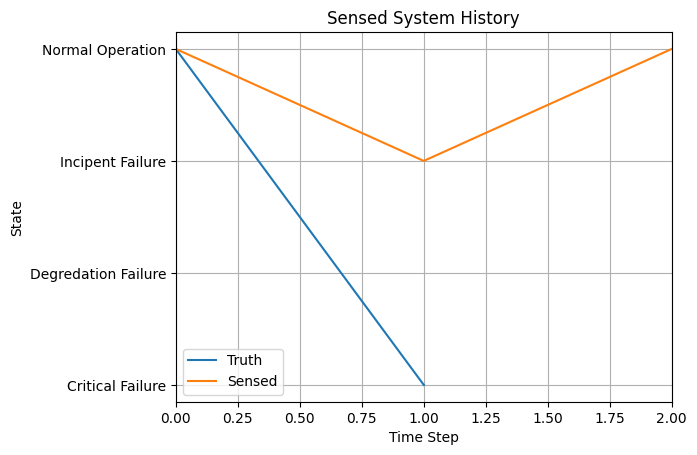

In [4]:
# steps = 10

# for i in range(steps):
#     sys.simulate(1)
#     print('Step: ', i)
#     sys.outputSystemStates()    
#     print('')
# sys.plotHistory()

sys.simulate(50)
sys.plotHistory()

# sys.reset()

In [ ]:
# error checking on the components
print(sc1.comp.history)
print(sc2.comp.history)
print(sc3.comp.history)



#erroer checking on attached sensors
for i in range(len(sc1.sensors)):
    print(f"sensed comp 1, sensor {i} history : {sc1.sensors[i].history}")
    print(sc2.sensors[i].history)
    print(sc3.sensors[i].history)
    



[3, 0, 0]
[3, 2, 1]
[3, 2, 1]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 1, 1]
[1, 0, 0]
[1, 1, 0]
[1, 0, 0]
[1, 1, 0]
[1, 1, 1]


### Simulating a parallel system